In [1]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/Econ 484/datasets'

Mounted at /content/gdrive
/content/gdrive/My Drive/Econ 484/datasets


In [2]:
# import the modules and function you will use here
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [3]:
hitters = pd.read_csv('Hitters.csv')
carseats = pd.read_csv('Carseats.csv')



This problem deals with regularized regression. The boston dataset is described right after it is loaded in just by running the code that is aleardy there.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

$(a)$ Split the data into a train and a test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

$(b)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. For now, use the default for the penalty coefficient. Display the coefficients and test error for each.

In [6]:
#add the error here
from sklearn.metrics import mean_squared_error
OLS = LinearRegression().fit(X_train, y_train)

print(OLS.coef_)
error_OLS_test = mean_squared_error(y_test,OLS.predict(X_test))
error_OLS = mean_squared_error(y_train, OLS.predict(X_train))
print(f'Test Errror is {error_OLS_test}')
print(f'Training Errror is {error_OLS}')

LASSO = linear_model.Lasso().fit(X_train,y_train)
print(LASSO.coef_)
error_LASSO_test = mean_squared_error(y_test,LASSO.predict(X_test))
error_LASSO = mean_squared_error(y_train, LASSO.predict(X_train))
print(f'Training Errror is {error_LASSO}')
print(f'Test Errror is {error_LASSO_test}')

RIDGE = linear_model.Ridge().fit(X_train,y_train)
print(RIDGE.coef_)
error_RIDGE_test = mean_squared_error(y_test,RIDGE.predict(X_test))
error_RIDGE = mean_squared_error(y_train, RIDGE.predict(X_train))
print(f'Training Errror is {error_RIDGE}')
print(f'Test Errror is {error_RIDGE_test}')

NET = linear_model.ElasticNet().fit(X_train,y_train)
print(NET.coef_)
error_NET_test = mean_squared_error(y_test,NET.predict(X_test))
error_NET = mean_squared_error(y_train, NET.predict(X_train))
print(f'Training Errror is {error_NET}')
print(f'Test Errror is {error_NET_test}')

[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
Test Errror is 22.09869482709843
Training Errror is 22.340057992152875
[-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]
Training Errror is 27.06530314480457
Test Errror is 24.390752590355174
[-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]
Training Errror is 22.51485687479268
Test Errror is 22.480475501233876
[-0.10270885  0.03414157 -0.00689058  0.         -0.          1.14428334
  0.01442808 -0.70930241  0.26472536 -0.01347162 -0.74428292  0.01200929
 -0.78282769]
Training Errror is 27.39484829191396
Test Errror is 24.093442479271562


$(c)$ Describe the differences that you see in the coefficients and error. What is the cause of this difference in coefficients?

In [7]:
#The coefficients are different because of the penalty parameters used. OLS has no penalty on the coefficients. Lasso has a lambda penalty
#that results in some coefficients having the possibility of going to zero. Ridge will shrink coefficients with its penalty. Elastic Nets give a combination
#of the penalties in Ridge and Lasso.

#The error is the smallest in OLS and larger in all the other methods. This difference is caused by the penalty paramters that aren't optimized

$(d)$ Use K-fold cross validation to find an optimal penalty parameter for Ridge and Lasso.

In [8]:
from sklearn.model_selection import GridSearchCV
lasso = linear_model.Lasso()
param_grid = {'alpha' : [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]}
grid_search = GridSearchCV(lasso,param_grid,cv=5,return_train_score=True)
best_model_lasso = grid_search.fit(X_train,y_train)

ridge = linear_model.Ridge()
param_grid = {'alpha' : [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]}
grid_search = GridSearchCV(ridge,param_grid,cv=5,return_train_score=True)
best_model_ridge = grid_search.fit(X_train,y_train)

print(best_model_lasso.best_params_)
print(best_model_lasso.best_score_)
print(best_model_ridge.best_params_)
print(best_model_ridge.best_score_)
error_RIDGECV_test = mean_squared_error(y_test,best_model_ridge.predict(X_test))
error_RIDGECV = mean_squared_error(y_train, best_model_ridge.predict(X_train))
error_LASSOCV_test = mean_squared_error(y_test,best_model_lasso.predict(X_test))
error_LASSOCV = mean_squared_error(y_train, best_model_lasso.predict(X_train))
print(f'Ridge Training Errror is {error_RIDGECV}')
print(f'Ridge Test Errror is {error_RIDGECV_test}')
print(f'Lasso Training Errror is {error_LASSOCV}')
print(f'Lasso Test Errror is {error_LASSOCV_test}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3417.3132955089372, tolerance: 2.703569412541254
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist

{'alpha': 0}
0.7155138299376527
{'alpha': 0}
0.7155138299376528
Ridge Training Errror is 22.340057992152868
Ridge Test Errror is 22.098694827098008
Lasso Training Errror is 22.340057992152875
Lasso Test Errror is 22.098694827097976


$(e)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV and Kfold cross validation with K=5 to find optimal parameters for the ElasticNet model. How do the test errors and optimal parameters differ?

In [9]:
net = linear_model.ElasticNet(max_iter=1000000)
param_grid = {'alpha' : [.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1]}
grid_search = GridSearchCV(net,param_grid,cv=X_train.shape[0],return_train_score=True) #making folds=rows is equivalent to LOOCV
gs2 = GridSearchCV(net,param_grid,cv=5,return_train_score=True) #k fold
best_model_net_loo = grid_search.fit(X_train,y_train)
best_model_net_k = grid_search.fit(X_train,y_train)
print(best_model_net_loo.best_params_)
print(best_model_net_loo.best_score_)
print(best_model_net_k.best_params_)
print(best_model_net_k.best_score_)


#THe R^2 isn't well defined so the results aaren't useful for either k fold or loocv.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less th

{'alpha': 0.05}
nan
{'alpha': 0.05}
nan


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

$(f)$ Now that we have tuned the models to perform about as well as they can, which one performs best on the training data? Which one performs best on the test data? Which of these models allow us to do effective causal inference with the coefficients? Why?

In [10]:
#OLS performs the best on the test data and the training data. OLS is the only one that allows us to do causal inference because it doesn't bias
#the coefficients. OLS is BLUE whereas the other methods introduce bias to get better predictions which interferes with causal inference.

For the next problem we will be using the `Carseats` data set that is available on learningsuite. Load the data and convert the text variables into dummies so that we can use them in the data. Pandas has a function called `get_dummies` that you might want to use.

In [11]:
import pandas as pd
carseats = pd.read_csv("Carseats.csv")
carseats = pd.get_dummies(carseats)

y = carseats["Sales"]
X = carseats.drop(['Sales'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

Now that the data has only numeric columns, we can proceed to the analysis.  
Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set with the default depth. What train and test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? Plot a tree with a depth of 3, and interpret the results.  
(d) Use a bagging approach in order to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [12]:
from sklearn.tree import DecisionTreeRegressor

TREE = DecisionTreeRegressor().fit(X_train, y_train)
error_TREE_test = mean_squared_error(y_test,TREE.predict(X_test))
error_TREE = mean_squared_error(y_train, TREE.predict(X_train))
print(f'Training Errror is {error_TREE}')
print(f'Test Errror is {error_TREE_test}')

Training Errror is 0.0
Test Errror is 4.321066


{'max_depth': 2}
0.2716211424988898
Training Errror is 4.6730118753624375
Test Errror is 5.13434941230964


[Text(372.0, 634.1999999999999, 'X[9] <= 0.5\nmse = 7.497\nsamples = 300\nvalue = 7.397'),
 Text(186.0, 453.0, 'X[5] <= 105.5\nmse = 6.088\nsamples = 239\nvalue = 6.78'),
 Text(93.0, 271.79999999999995, 'X[6] <= 49.5\nmse = 5.498\nsamples = 79\nvalue = 8.294'),
 Text(46.5, 90.60000000000002, 'mse = 2.945\nsamples = 32\nvalue = 9.718'),
 Text(139.5, 90.60000000000002, 'mse = 4.918\nsamples = 47\nvalue = 7.325'),
 Text(279.0, 271.79999999999995, 'X[8] <= 0.5\nmse = 4.689\nsamples = 160\nvalue = 6.032'),
 Text(232.5, 90.60000000000002, 'mse = 4.084\nsamples = 114\nvalue = 6.54'),
 Text(325.5, 90.60000000000002, 'mse = 3.963\nsamples = 46\nvalue = 4.774'),
 Text(558.0, 453.0, 'X[5] <= 135.0\nmse = 5.683\nsamples = 61\nvalue = 9.814'),
 Text(465.0, 271.79999999999995, 'X[5] <= 73.0\nmse = 3.74\nsamples = 48\nvalue = 10.572'),
 Text(418.5, 90.60000000000002, 'mse = 1.171\nsamples = 3\nvalue = 14.327'),
 Text(511.5, 90.60000000000002, 'mse = 2.909\nsamples = 45\nvalue = 10.321'),
 Text(651.0,

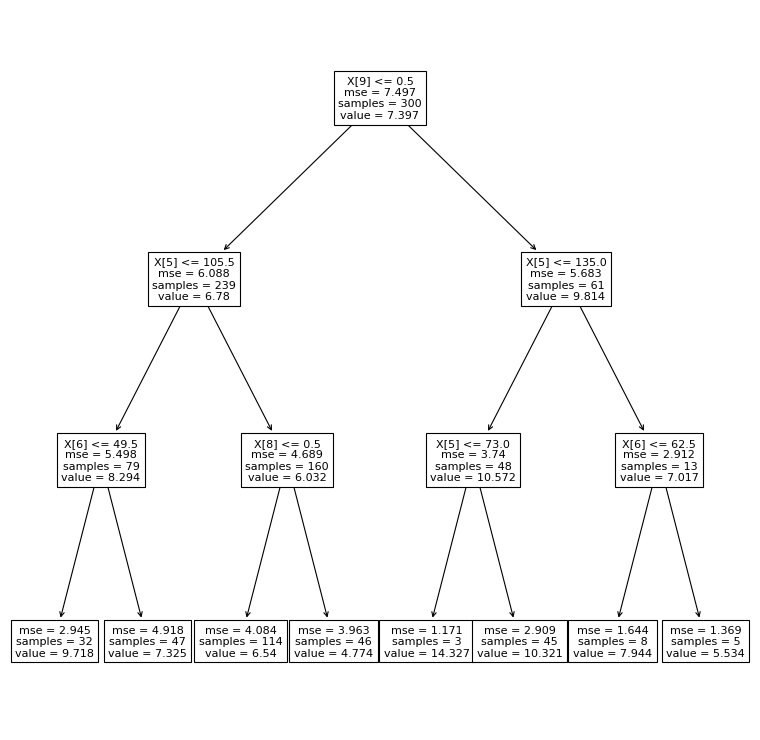

In [13]:
tree = DecisionTreeRegressor()
param_grid = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(tree,param_grid,cv=5,return_train_score=True) #making folds=rows is equivalent to LOOCV
best_model_tree = grid_search.fit(X_train,y_train)

print(best_model_tree.best_params_)
print(best_model_tree.best_score_)
error_tree_test = mean_squared_error(y_train,best_model_tree.predict(X_train))
error_tree = mean_squared_error(y_test, best_model_tree.predict(X_test))
print(f'Training Errror is {error_tree_test}')
print(f'Test Errror is {error_tree}')


best_tree=DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
##Plot tree
from sklearn import tree as t
from matplotlib.pyplot import figure
figure(figsize=(12,12),dpi=80)
t.plot_tree(best_tree,fontsize=10)

#for the tree with a depth of three the mse is 3.7. THis means that the the average square error between the prediction and the actual sales is
#3.7 on average in the training and about 5 in the test set. The decision tree splits the ninth variable first and then the fifth. Pruning the tree did not 
#improve the MSE since it is 5.13

In [14]:
tree_3 = DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
error_tree_test_3 = mean_squared_error(y_train,tree_3.predict(X_train))
error_tree_3 = mean_squared_error(y_test, tree_3.predict(X_test))
print(f'Training Errror is {error_tree_test_3}')
print(f'Test Errror is {error_tree_3}')

#my explanation for these results is in the above code comments

Training Errror is 3.758894774930485
Test Errror is 5.0218845133211625


Training Errror is 0.6557337633333332
Test Errror is 3.298656489999999
[0.03596229 0.10282362 0.03993695 0.07039593 0.04149333 0.33259272
 0.08677192 0.03342058 0.08471969 0.14345494 0.01311544 0.00377782
 0.00340935 0.00534462 0.00278081]


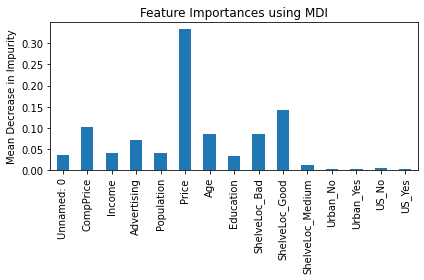

In [15]:
#bagging
from sklearn.ensemble import BaggingRegressor
import numpy as np
import matplotlib.pyplot as plt

bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=10, random_state=42).fit(X_train, y_train)
bag_error = mean_squared_error(y_train,bag.predict(X_train))
bag_test_error = mean_squared_error(y_test, bag.predict(X_test))
print(f'Training Errror is {bag_error}')
print(f'Test Errror is {bag_test_error}')
#bag.feature_importances_


#this should plot the feature importances
feature_importances = np.mean([tree.feature_importances_ for tree in bag.estimators_],axis=0)
print(feature_importances)
bag_importances = pd.Series(feature_importances)
fig, ax = plt.subplots()
bag_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xticklabels(X.columns)
fig.tight_layout()

Training Errror is 0.37017220443333276
Test Errror is 2.925013493699997
Training Errror is 0.4557540821333331
Test Errror is 3.8136322281999986
Training Errror is 0.406347942033333
Test Errror is 3.2314129185999976
[0.05290099 0.07784872 0.06332914 0.08221997 0.05448598 0.25558168
 0.10894048 0.03983675 0.07759206 0.12354276 0.03283454 0.00630447
 0.00702289 0.00932258 0.00823697]


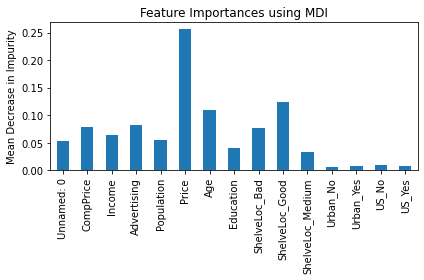

In [16]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(X_train,y_train)
rf_error = mean_squared_error(y_train,rf.predict(X_train))
rf_test_error = mean_squared_error(y_test, rf.predict(X_test))
print(f'Training Errror is {rf_error}')
print(f'Test Errror is {rf_test_error}')

rf = RandomForestRegressor(max_features=3).fit(X_train,y_train)
rf_error = mean_squared_error(y_train,rf.predict(X_train))
rf_test_error = mean_squared_error(y_test, rf.predict(X_test))
print(f'Training Errror is {rf_error}')
print(f'Test Errror is {rf_test_error}')

rf = RandomForestRegressor(max_features=5).fit(X_train,y_train)
rf_error = mean_squared_error(y_train,rf.predict(X_train))
rf_test_error = mean_squared_error(y_test, rf.predict(X_test))
print(f'Training Errror is {rf_error}')
print(f'Test Errror is {rf_test_error}')

feature_importances = np.mean([thing.feature_importances_ for thing in rf.estimators_],axis=0)
print(feature_importances)
rf_importances = pd.Series(feature_importances)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xticklabels(X.columns)
fig.tight_layout()

#Shelf, GOod, and Age seem to be the most important
#Accuracy goes up when M increases

We will now use boosting to predict Log Salary in the `Hitters` data set.  
(a) Format the data appropriately for this analysis. Use 200 observations in your training set.  
(b) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. The shrinkage parameter is often referred to as the learning rate   
(c) Compare the test MSE of boosting to the test MSE of two of the penalized regression approaches that we discussed  
(d) Which variables appear to be the most important predictors in the boosted model?  
(e) The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.  
(f) Now that the boosting model is tuned, let's compare the results to bagging and random forests. Report test errors for your models and discuss how they compare.

In [17]:
import numpy as np
hitters=hitters.dropna()
hitters=pd.get_dummies(hitters)
y=np.log(hitters['Salary'])
x=hitters.drop('Salary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42,train_size=200)
hitters.dtypes


AtBat            int64
Hits             int64
HmRun            int64
Runs             int64
RBI              int64
Walks            int64
Years            int64
CAtBat           int64
CHits            int64
CHmRun           int64
CRuns            int64
CRBI             int64
CWalks           int64
PutOuts          int64
Assists          int64
Errors           int64
Salary         float64
League_A         uint8
League_N         uint8
Division_E       uint8
Division_W       uint8
NewLeague_A      uint8
NewLeague_N      uint8
dtype: object

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1).fit(X_train,y_train)
boost_error = mean_squared_error(y_train,boost.predict(X_train))
boost_test_error = mean_squared_error(y_test, boost.predict(X_test))
print(f'Training Errror is {boost_error}')
print(f'Test Errror is {boost_test_error}')
boost.feature_importances_


Training Errror is 9.981999064861107e-08
Test Errror is 0.2589936733946472


array([3.54826379e-02, 3.87129439e-02, 4.89501048e-03, 4.59890832e-03,
       1.43573810e-02, 1.83547587e-02, 2.22240862e-02, 2.81576486e-01,
       1.49435780e-01, 2.91046515e-02, 2.51455308e-01, 7.39489395e-02,
       3.71841921e-02, 2.02676286e-02, 4.82918975e-03, 9.39667177e-03,
       1.15178268e-03, 7.69312006e-04, 6.83890184e-05, 2.66046224e-05,
       9.80242749e-04, 1.17909461e-03])

In [19]:
shrink_list = [.01,.05,.1,.15,.2]
boost_error_list = []
for i in shrink_list:
  boost = GradientBoostingRegressor(n_estimators=1000, learning_rate=i).fit(X_train,y_train)
  boost_error_list.append(mean_squared_error(y_test, boost.predict(X_test)))

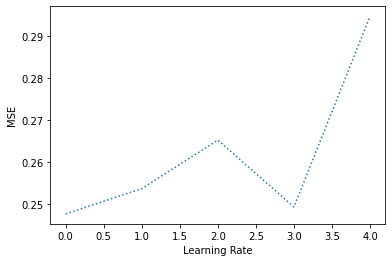

In [20]:
ypoints = np.array(boost_error_list)
xpoints = np.array([.01,.05,.1,.15,.2])
plt.plot(ypoints, linestyle = 'dotted')
plt.xlabel("Learning Rate")
plt.ylabel("MSE")
plt.show()

#The test error rate was lower (2.6) than it was for the other trees which were in the 3.5 range. The most important features are similar but without
#as strong of importance because it is a slower learning rate.

#The test error is also lower than the test error in the other penalized regression approaches because the penalized approaches wither in the 4-5 range for MSE

#I don't think the max depth of 3 is the optimal depth because with random forest or boosting or other ensemble methods
#you can have much more depth but lower MSE

In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  

#### NOTE: SVM algortihms will often take longer than other models to train, particularly when doing cross validation

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.  
(c) Make an ROC curve for your model. The module scikitplot has a nice function you might want to use but you should eb able to make it on your own or another module if you desire.

In [21]:
auto = pd.read_csv('Auto.csv')
auto = auto[auto['horsepower'] != "?"] #index with true false and then reindex to drop unknown horsepower
auto['horsepower'] = auto['horsepower'].astype("int32")
auto = auto.drop(['name'],axis=1) #figure this out


y=[]
for i in auto['mpg']:
  if i > auto['mpg'].median():
    y.append(1)
  else:
    y.append(0)


X=auto.drop('mpg',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #create scaler object
scaler.fit(X_train) #feed the scaler object the x
x_scaled = scaler.transform(X_train)
x_scaled_test = scaler.transform(X_test)

In [22]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_scaled, y_train)

#run a few svc's with different c values to get the MSE 

param_grid = {'C': [.01,.05,.1, .15,.2,.3,.4,.5,1],'gamma': [1,1.1,1.2,1.3,1.5,1.7,2,2.5],'kernel':['rbf','poly','linear']}
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(x_scaled,y_train)
print("Best C: ",best_model.best_estimator_.get_params()['C'])
print("Best gamma: ",best_model.best_estimator_.get_params()['gamma'])
print("Best kernel: ",best_model.best_estimator_.get_params()['kernel'])
print(mean_squared_error(y_test, best_model.predict(x_scaled_test)))

#I fit the svc for many different gamma, c, and kernel values. The best value of C was 1, gamma 1.3, and kernel was rbf. THose had the lowest test error

Best C:  1
Best gamma:  1.3
Best kernel:  rbf
0.12244897959183673


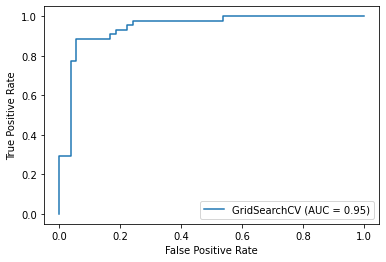

In [23]:
from sklearn import metrics
metrics.plot_roc_curve(best_model, x_scaled_test, y_test)

Below there are some generated datasets of varying structure that you will classifying is SVMs, plotting the data to see what it looks like will likey be helpful. Find the basis kernel that does best job classifying each of them. Because the data is two dimensional, it might be nice to use a library like mlxtend which has a function that will display decision regions form an svm using a one of their functions.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


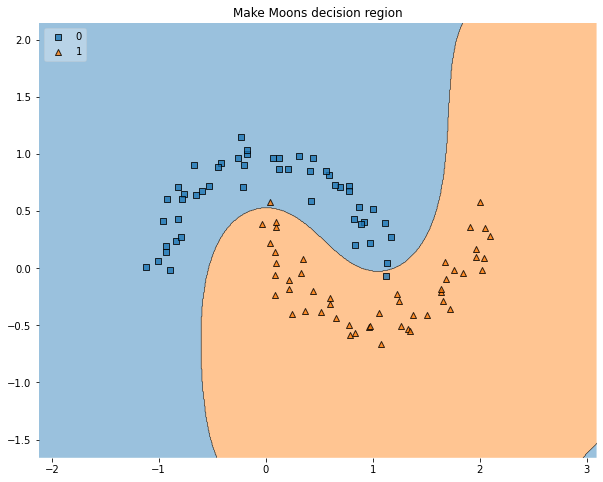

BEST KERNEL:  poly
Accuracy on training set: 0.973
Accuracy on test set: 0.840


In [24]:
from sklearn.datasets import make_moons
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
x, y = make_moons(n_samples=100, shuffle=True, noise=1/10, random_state=123)


svc = SVC()
# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

svc.fit(x, y)
ax = plt.subplot()
fig = plot_decision_regions(X=x, y=y, clf=svc, legend=2)
plt.title('Make Moons decision region')

plt.show()

#find best kernel
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

from sklearn.model_selection import GridSearchCV
# define grid for parameters
param_grid = {'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(SVC() ,param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(x_train, y_train)
print("BEST KERNEL: ", best_model.best_estimator_.get_params()['kernel'])

# print out scores
print("Accuracy on training set: {:.3f}".format(best_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


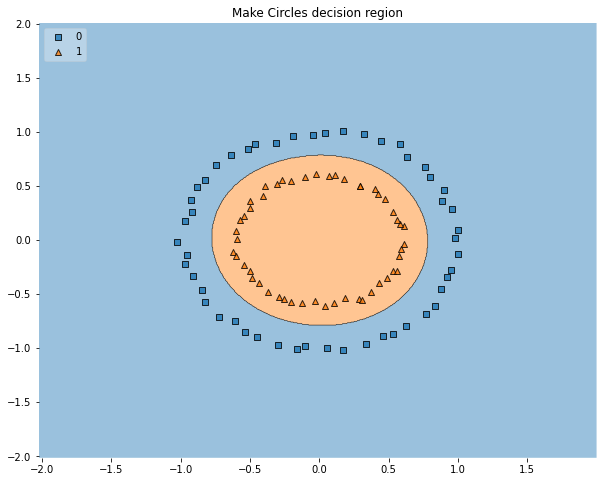

BEST KERNEL:  rbf
Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [25]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=100, shuffle=False, noise=1/50, random_state=123, factor=0.6)

svc = SVC()

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

svc.fit(x, y)
ax = plt.subplot()
fig = plot_decision_regions(X=x, y=y, clf=svc, legend=2)
plt.title('Make Circles decision region')

plt.show()

#find best kernel
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

from sklearn.model_selection import GridSearchCV
# define grid for parameters
param_grid = {'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(SVC() ,param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(x_train, y_train)
print("BEST KERNEL: ", best_model.best_estimator_.get_params()['kernel'])

# print out scores
print("Accuracy on training set: {:.3f}".format(best_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(x_test, y_test)))



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


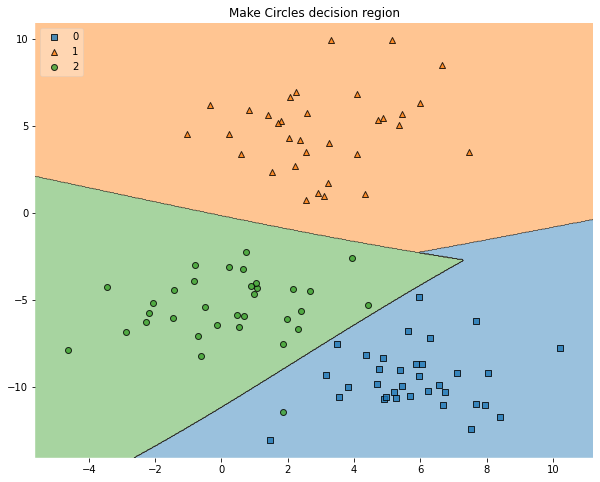

BEST KERNEL:  rbf
Accuracy on training set: 1.000
Accuracy on test set: 0.960


In [26]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=2.0,
           center_box=(-10.0, 10.0), shuffle=True, random_state=10)

svc = SVC()

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

svc.fit(x, y)
ax = plt.subplot()
fig = plot_decision_regions(X=x, y=y, clf=svc, legend=2)
plt.title('Make Circles decision region')

plt.show()

#find best kernel
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

from sklearn.model_selection import GridSearchCV
# define grid for parameters
param_grid = {'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(SVC() ,param_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(x_train, y_train)
print("BEST KERNEL: ", best_model.best_estimator_.get_params()['kernel'])

# print out scores
print("Accuracy on training set: {:.3f}".format(best_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(x_test, y_test)))